In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from main import get_args
from rxnscribe.dataset import ReactionDataset
from rxnscribe.tokenizer import get_tokenizer
import torchvision.transforms.functional as F

args = get_args(notebook=True)
args.format = 'bbox'
args.pix2seq = True
args.data_path = ''
args.image_path = '../data/detect/images'
args.train_file = 'annotations_dec.json'
args.num_train_example = None
args.augment = True
args.composite_augment = True
args.rand_order = True

tokenizer = get_tokenizer(args)
train_dataset = ReactionDataset(args, tokenizer, '../data/coref/splits/annotations/coref_test.json', split='train', debug=True)

In [13]:
image, target = train_dataset.load_and_prepare(0)

print(target)

{'id': 2, 'width': 1356, 'height': 688, 'file_name': 'jacs.5b12989-Table-c3.png', 'license': 0, 'bboxes': [{'id': 0, 'bbox': [6.65, 262.6, 1338.95, 417.44], 'category_id': 4}, {'id': 1, 'bbox': [965.41, 10.46, 176.88, 169.79], 'category_id': 1}, {'id': 2, 'bbox': [624.51, 10.46, 176.0, 169.79], 'category_id': 1}, {'id': 3, 'bbox': [209.94, 14.9, 176.88, 165.3], 'category_id': 1}, {'id': 4, 'bbox': [399.03, 42.42, 119.18, 58.82], 'category_id': 2}, {'id': 5, 'bbox': [399.03, 122.3, 172.44, 62.38], 'category_id': 2}, {'id': 6, 'bbox': [815.38, 103.68, 134.27, 33.07], 'category_id': 2}, {'id': 7, 'bbox': [288.95, 206.65, 23.3, 29.52], 'category_id': 3}, {'id': 8, 'bbox': [707.96, 206.65, 25.97, 29.52], 'category_id': 3}, {'id': 9, 'bbox': [1051.52, 206.65, 49.94, 29.52], 'category_id': 3}, {'id': 10, 'bbox': [815.38, 35.32, 100.54, 59.7], 'category_id': 2}], 'reactions': [{'reactants': [3], 'conditions': [4, 5], 'products': [2]}, {'reactants': [2], 'conditions': [10, 6], 'products': [1]}]

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[]
[]


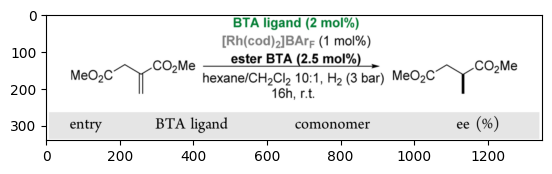

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[8, 2], [7, 1], [6, 10], [0, 3]]
[tensor([848.1500,  59.8400, 994.5000, 169.5500]), tensor([878.0600, 201.8700, 959.2400, 236.3200]), tensor([1127.7000,   41.5100, 1400.1399,  213.0900]), tensor([1262.9500,  198.6300, 1312.3300,  235.0300]), tensor([1908.1100,    9.1000, 2265.7900,  197.3800]), tensor([2043.1100,  201.8700, 2071.0701,  236.9700]), tensor([2390.3501,   60.3800, 2537.0901,  172.7200]), tensor([2443.5801,  201.8700, 2472.1902,  236.9700])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(848.1500) tensor(59.8400)
tensor(878.0600) tensor(201.8700)
tensor(1127.7000) tensor(41.5100)
tensor(1262.9500) tensor(198.6300)
tensor(1908.1100) tensor(9.1000)
tensor(2043.1100) tensor(201.8700)
tensor(2390.3501) tensor(60.3800)
tensor(2443.5801) tensor(2

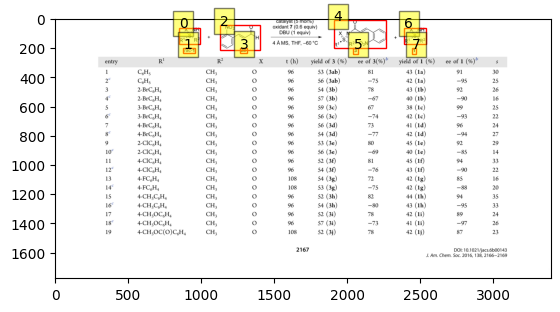

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 7], [2, 8], [1, 9]]
[tensor([209.9400,  14.9000, 386.8200, 180.2000]), tensor([288.9500, 206.6500, 312.2500, 236.1700]), tensor([624.5100,  10.4600, 800.5100, 180.2500]), tensor([707.9600, 206.6500, 733.9300, 236.1700]), tensor([ 965.4100,   10.4600, 1142.2900,  180.2500]), tensor([1051.5200,  206.6500, 1101.4600,  236.1700])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(209.9400) tensor(14.9000)
tensor(288.9500) tensor(206.6500)
tensor(624.5100) tensor(10.4600)
tensor(707.9600) tensor(206.6500)
tensor(965.4100) tensor(10.4600)
tensor(1051.5200) tensor(206.6500)


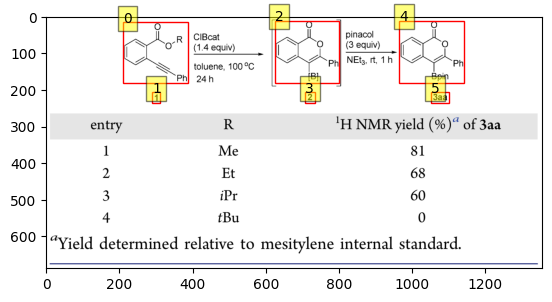

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 4], [7, 8], [6, 3]]
[tensor([ 68.9200,  18.5400, 269.2600, 203.1500]), tensor([169.6600, 223.1900, 192.1300, 251.9500]), tensor([558.5000,  24.8400, 750.9700, 209.4500]), tensor([627.7500, 223.1900, 656.5200, 251.9500]), tensor([1000.8400,   24.8400, 1193.3201,  212.5900]), tensor([ 963.0600,  223.1900, 1262.5800,  285.0100])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(68.9200) tensor(18.5400)
tensor(169.6600) tensor(223.1900)
tensor(558.5000) tensor(24.8400)
tensor(627.7500) tensor(223.1900)
tensor(1000.8400) tensor(24.8400)
tensor(963.0600) tensor(223.1900)


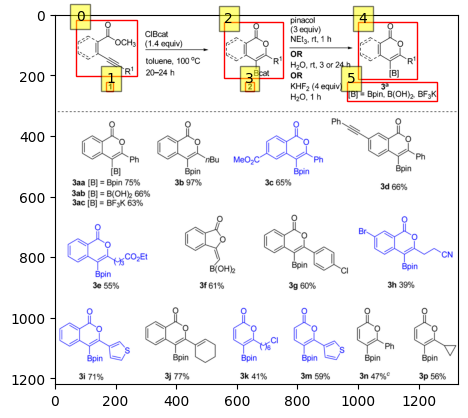

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 9], [2, 0], [5, 10]]
[tensor([205.2700,  17.2700, 392.3200, 188.0500]), tensor([285.5900, 211.4700, 321.1500, 242.9600]), tensor([590.6300,  12.1800, 773.6100, 187.0400]), tensor([678.0700, 211.4700, 716.6700, 242.9600]), tensor([ 965.8200,   12.1800, 1146.8000,  187.0400]), tensor([1054.2800,  211.4700, 1104.0601,  242.9600])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(205.2700) tensor(17.2700)
tensor(285.5900) tensor(211.4700)
tensor(590.6300) tensor(12.1800)
tensor(678.0700) tensor(211.4700)
tensor(965.8200) tensor(12.1800)
tensor(1054.2800) tensor(211.4700)


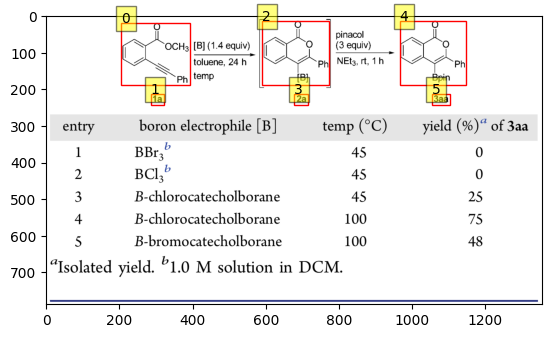

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 11], [3, 12]]
[tensor([476.8200,  43.4400, 768.9000, 332.8300]), tensor([732.2700, 320.5300, 764.5700, 358.0300]), tensor([ 966.0600,   55.5600, 1317.8800,  318.2000]), tensor([1276.9200,  314.3800, 1309.2201,  354.5700])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(476.8200) tensor(43.4400)
tensor(732.2700) tensor(320.5300)
tensor(966.0600) tensor(55.5600)
tensor(1276.9200) tensor(314.3800)


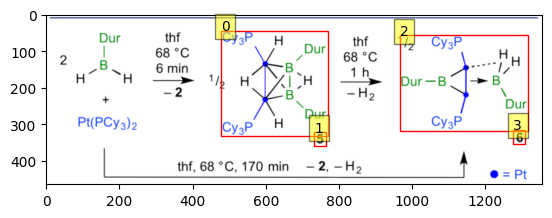

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 8], [5, 7], [4, 2]]
[tensor([ 94.0400,  47.1400, 346.0400, 149.5700]), tensor([149.5900, 157.1800, 199.6700, 196.5700]), tensor([705.1600,  14.0200, 964.6400, 155.9800]), tensor([771.4000, 156.1100, 822.5400, 196.5700]), tensor([ 998.9600,   42.8600, 1249.9000,  157.0400]), tensor([1058.7900,  158.2500, 1108.8700,  196.5700])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(94.0400) tensor(47.1400)
tensor(149.5900) tensor(157.1800)
tensor(705.1600) tensor(14.0200)
tensor(771.4000) tensor(156.1100)
tensor(998.9600) tensor(42.8600)
tensor(1058.7900) tensor(158.2500)


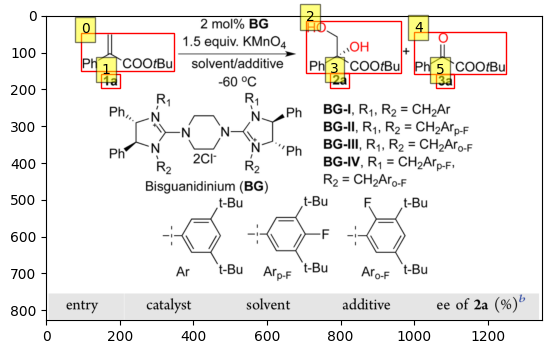

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[7, 9], [5, 0], [10, 11]]
[tensor([ 724.4700,   55.3000, 1023.4800,  226.1600]), tensor([1036.2000,  119.3800, 1340.3899,  198.4500]), tensor([ 715.8100,  274.3800, 1014.8200,  441.7600]), tensor([797.2100, 451.8900, 939.4800, 491.1200]), tensor([1089.8800,  276.1100, 1319.6100,  441.7600]), tensor([1123.6500,  451.8900, 1283.2500,  491.1200])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(724.4700) tensor(55.3000)
tensor(1036.2000) tensor(119.3800)
tensor(715.8100) tensor(274.3800)
tensor(797.2100) tensor(451.8900)
tensor(1089.8800) tensor(276.1100)
tensor(1123.6500) tensor(451.8900)


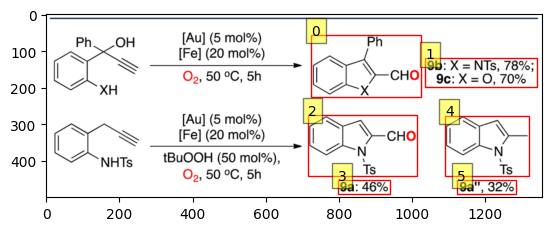

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[17, 1], [14, 21], [13, 20], [16, 19], [12, 4], [15, 18], [11, 5]]
[tensor([ 11.3800, 114.5600, 250.6300, 242.9100]), tensor([105.4400, 270.3900, 157.9800, 314.5100]), tensor([745.6000,  96.3100, 979.2400, 263.9700]), tensor([ 716.1200,  268.9900, 1005.9100,  313.1000]), tensor([1082.5300,   96.3100, 1313.3600,  262.5600]), tensor([1114.8199,  268.9900, 1279.6699,  313.1000]), tensor([ 11.3800, 365.8500, 252.0400, 532.1100]), tensor([101.2200, 531.5100, 158.0000, 575.6300]), tensor([745.6000, 344.8000, 977.8400, 558.7800]), tensor([732.9700, 531.5100, 887.9900, 578.4300]), tensor([ 11.3800, 611.5300, 250.6300, 777.7900]), tensor([101.2200, 781.4000, 159.3800, 824.1100]), tensor([ 160.1900,  865.6300,  392.4200, 1079.6200]), tensor([ 243.0200, 1042.5200,  309.5900, 1083.8000])]
[tensor(1), tensor(3), 

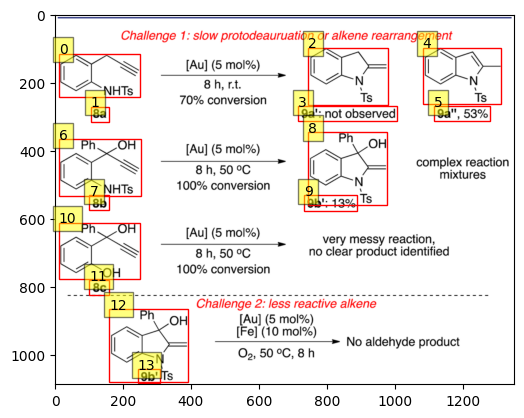

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[14, 10], [12, 5], [11, 4], [13, 19]]
[tensor([ 77.4000,  76.0200, 305.6000, 201.4800]), tensor([163.7400, 213.2900, 213.2200, 250.6900]), tensor([833.7000,  46.6700, 997.1400, 208.3900]), tensor([889.8100, 231.4200, 941.8900, 270.5500]), tensor([1061.6200,   48.4000, 1288.0900,  224.7900]), tensor([1148.8199,  231.4200, 1200.0299,  270.5500]), tensor([ 61.0000, 420.5000, 361.7200, 601.2100]), tensor([161.1500, 606.9800, 214.0900, 647.8300])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(77.4000) tensor(76.0200)
tensor(163.7400) tensor(213.2900)
tensor(833.7000) tensor(46.6700)
tensor(889.8100) tensor(231.4200)
tensor(1061.6200) tensor(48.4000)
tensor(1148.8199) tensor(231.4200)
tensor(61.) tensor(420.5000)
tensor(161.1500) tensor(606.9800)


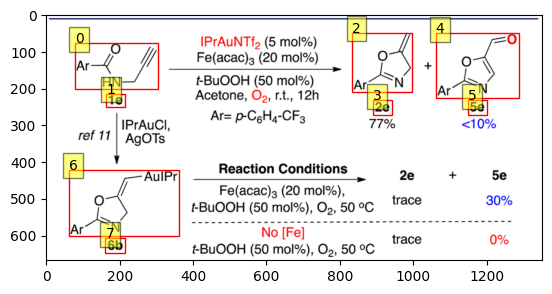

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[13, 20], [12, 19], [11, 18], [10, 17], [9, 0], [23, 24], [22, 16], [21, 15]]
[tensor([ 22.6500,  82.6300, 257.1000, 210.8900]), tensor([131.7000, 213.2000, 182.4800, 253.9400]), tensor([641.0700,  61.1100, 828.1600, 210.8900]), tensor([744.3800, 227.5500, 796.6000, 269.7200]), tensor([ 863.4700,   46.7600, 1034.7800,  205.1600]), tensor([ 950.9900,  223.2400, 1007.5200,  265.4200]), tensor([1090.1700,   45.3200, 1324.6200,  216.6300]), tensor([1174.8300,  223.2400, 1228.4800,  265.4200]), tensor([ 85.7900, 587.6900, 320.2300, 715.9600]), tensor([193.4000, 728.3100, 247.0500, 769.0500]), tensor([ 877.8200,  563.3000, 1133.7800,  743.2200]), tensor([ 981.1200,  738.3500, 1036.2100,  779.0900]), tensor([ 68.5700, 844.5300, 300.1400, 974.2300]), tensor([ 174.7500,  980.8400,  228.4000, 1023.0100]), tens

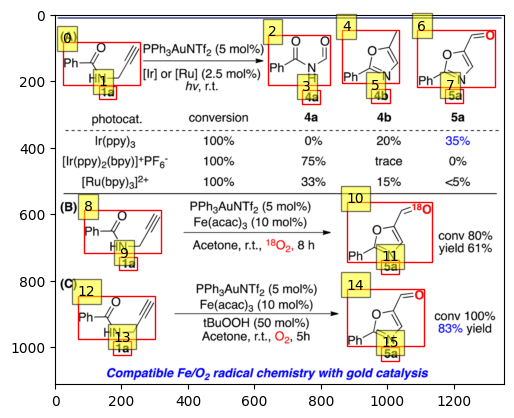

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[20, 12], [19, 13], [21, 14], [0, 15], [2, 17], [1, 16]]
[tensor([ 17.4000, 271.3800, 242.8600, 397.8300]), tensor([124.5900, 411.2700, 171.1000, 449.6100]), tensor([553.3500, 271.3800, 719.7600, 427.8100]), tensor([618.7500, 425.8100, 667.9900, 463.2300]), tensor([1056.5900,   44.2900, 1300.2200,  212.5200]), tensor([1150.1600,  214.1500, 1203.9301,  252.4900]), tensor([1045.6899,  250.4900, 1310.2200,  418.7200]), tensor([1151.9700,  422.1700, 1202.1200,  462.3300]), tensor([1020.2600,  496.6600, 1332.0200,  663.9900]), tensor([1151.0601,  659.2600, 1203.0300,  697.6000]), tensor([ 18.3100, 496.6600, 295.5500, 663.9900]), tensor([120.9500, 659.2600, 170.1900, 695.7800])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(

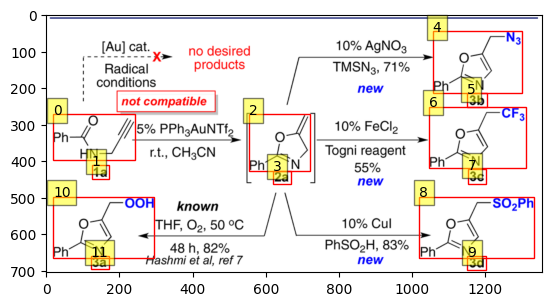

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 5], [2, 4]]
[tensor([364.4300,  10.3600, 599.7200, 181.6500]), tensor([467.6500, 185.8400, 504.7500, 226.0400]), tensor([ 806.2300,    2.1000, 1083.8500,  185.7800]), tensor([935.2600, 184.8100, 972.3600, 221.9100])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(364.4300) tensor(10.3600)
tensor(467.6500) tensor(185.8400)
tensor(806.2300) tensor(2.1000)
tensor(935.2600) tensor(184.8100)


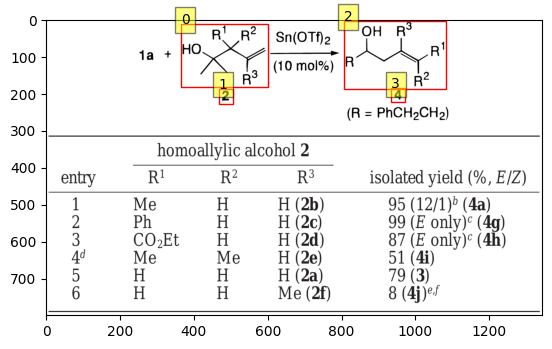

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 2], [5, 0]]
[tensor([251.1800,  55.5000, 363.0400,  93.5500]), tensor([299.2400, 135.3200, 324.4200, 172.5100]), tensor([ 839.9300,   11.7400, 1091.6799,  130.4600]), tensor([942.0600, 132.7500, 972.3900, 169.9300])]
[tensor(2), tensor(3), tensor(1), tensor(3)]
tensor(251.1800) tensor(55.5000)
tensor(299.2400) tensor(135.3200)
tensor(839.9300) tensor(11.7400)
tensor(942.0600) tensor(132.7500)


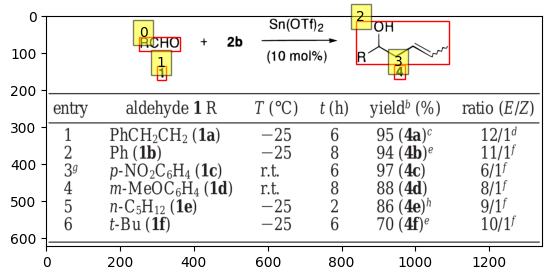

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[1, 8], [0, 5], [7, 4]]
[tensor([  6.1700,   4.4100, 354.8500, 238.7000]), tensor([187.8600, 197.9800, 304.5300, 247.0300]), tensor([101.2000, 296.5300, 321.4100, 520.2600]), tensor([130.5300, 477.0700, 184.4500, 520.1800]), tensor([ 592.1700,   87.1200, 1012.9900,  384.7600]), tensor([813.1200, 368.3500, 868.6600, 409.3000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(6.1700) tensor(4.4100)
tensor(187.8600) tensor(197.9800)
tensor(101.2000) tensor(296.5300)
tensor(130.5300) tensor(477.0700)
tensor(592.1700) tensor(87.1200)
tensor(813.1200) tensor(368.3500)


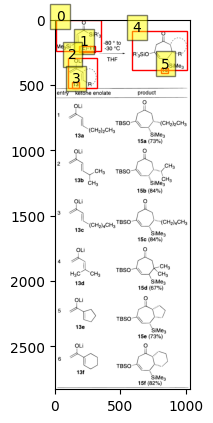

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[]
[]


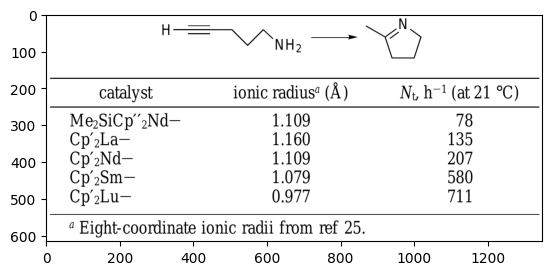

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[]
[]


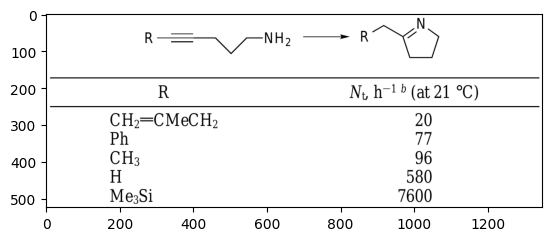

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[]
[]
[]


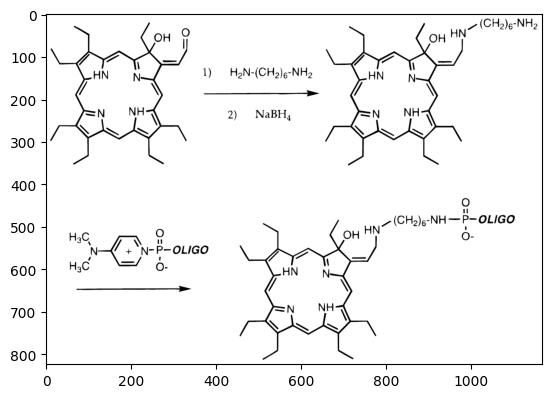

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 11], [3, 10]]
[tensor([ 626.8600,  154.2100, 1067.9399,  588.9600]), tensor([1040.4200,  154.6100, 1066.2001,  180.3800]), tensor([ 445.3200,  895.1600, 1099.6100, 1329.9099]), tensor([1038.4399,  890.3100, 1064.2200,  924.0200])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(626.8600) tensor(154.2100)
tensor(1040.4200) tensor(154.6100)
tensor(445.3200) tensor(895.1600)
tensor(1038.4399) tensor(890.3100)


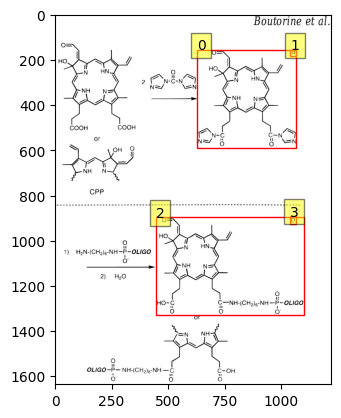

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 6], [1, 4]]
[tensor([ 92.0600,   4.5400, 391.5100, 148.6800]), tensor([289.4800, 171.6900, 332.2800, 209.2300]), tensor([ 815.9400,    8.4900, 1237.7800,  148.6800]), tensor([1021.2500,  170.3700, 1065.3700,  207.9100])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(92.0600) tensor(4.5400)
tensor(289.4800) tensor(171.6900)
tensor(815.9400) tensor(8.4900)
tensor(1021.2500) tensor(170.3700)


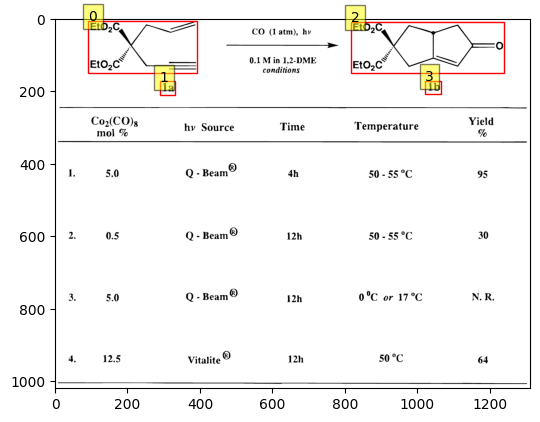

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 3], [4, 2]]
[tensor([  6.1600, 124.1900, 308.6000, 365.3600]), tensor([ 98.5100, 395.2700, 230.1500, 441.4800]), tensor([615.9000, 122.7100, 964.1100, 366.1000]), tensor([696.5600, 392.6600, 867.4400, 438.8600])]
[tensor(1), tensor(2), tensor(1), tensor(2)]
tensor(6.1600) tensor(124.1900)
tensor(98.5100) tensor(395.2700)
tensor(615.9000) tensor(122.7100)
tensor(696.5600) tensor(392.6600)


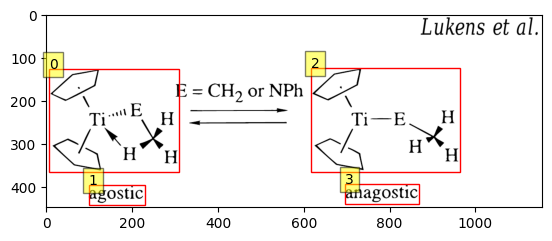

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 9], [4, 8], [3, 7], [10, 6]]
[tensor([ 50.6400,   4.7100, 357.4000, 242.4000]), tensor([211.2200, 250.7600, 264.1600, 293.3400]), tensor([536.7000,  11.6200, 798.5700, 265.7100]), tensor([706.7800, 250.7600, 764.9000, 293.3400]), tensor([ 750.8100,   25.4300, 1111.1000,  204.4200]), tensor([882.0400, 212.7800, 937.5699, 254.4900]), tensor([ 992.5500,  105.7200, 1294.1300,  305.4300]), tensor([1084.0601,  270.6200, 1137.0000,  310.6000])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(50.6400) tensor(4.7100)
tensor(211.2200) tensor(250.7600)
tensor(536.7000) tensor(11.6200)
tensor(706.7800) tensor(250.7600)
tensor(750.8100) tensor(25.4300)
tensor(882.0400) tensor(212.7800)
tensor(992.5500) tensor(105.7200)
tensor(1084.0601) tensor(270.6200)


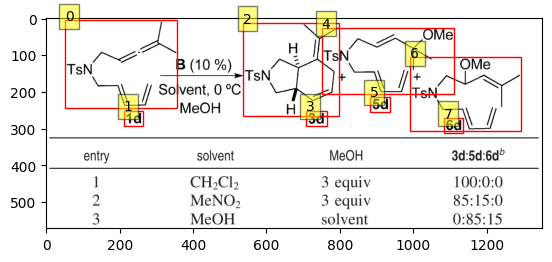

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 6], [2, 8], [1, 5]]
[tensor([ 76.1800,  59.3200, 412.6300, 294.0400]), tensor([306.1100, 266.9600, 361.0700, 307.9700]), tensor([710.2400,   4.9700, 964.4700, 296.8300]), tensor([863.5300, 271.1400, 917.0900, 313.5500]), tensor([ 990.3500,   31.4500, 1269.6599,  289.8600]), tensor([1178.4700,  265.5600, 1234.8199,  307.9700])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(76.1800) tensor(59.3200)
tensor(306.1100) tensor(266.9600)
tensor(710.2400) tensor(4.9700)
tensor(863.5300) tensor(271.1400)
tensor(990.3500) tensor(31.4500)
tensor(1178.4700) tensor(265.5600)


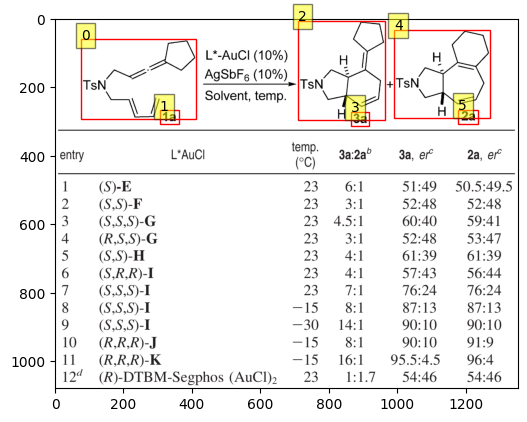

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[0, 4]]
[tensor([200.3000,   6.4200, 504.9000, 244.5900]), tensor([201.7200, 286.4300, 606.7600, 475.1000])]
[tensor(1), tensor(3)]
tensor(200.3000) tensor(6.4200)
tensor(201.7200) tensor(286.4300)


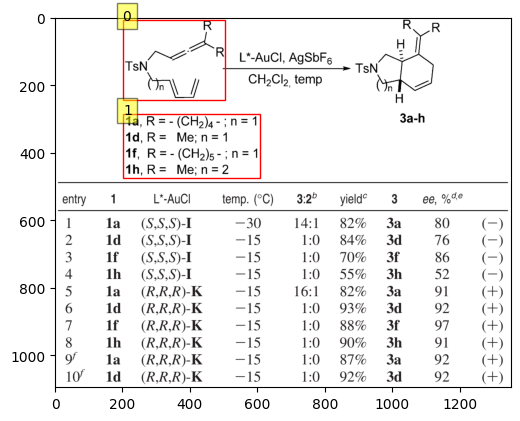

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[6, 2], [4, 3]]
[tensor([107.9000,  61.3100, 458.4900, 305.7400]), tensor([256.8400, 313.2500, 311.1300, 358.0300]), tensor([ 969.8700,    2.6800, 1233.3201,  307.3300]), tensor([1099.8000,  313.2500, 1158.8501,  358.0300])]
[tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(107.9000) tensor(61.3100)
tensor(256.8400) tensor(313.2500)
tensor(969.8700) tensor(2.6800)
tensor(1099.8000) tensor(313.2500)


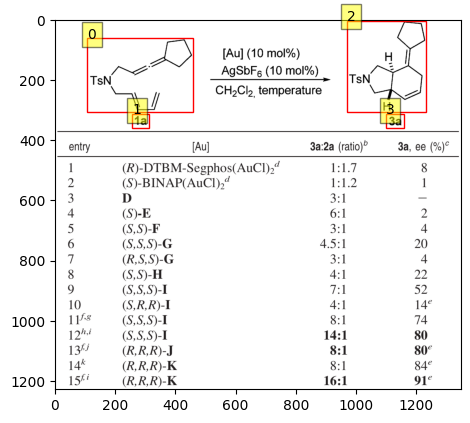

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 0], [3, 7], [4, 8]]
[tensor([ 64.0400,  32.0400, 410.8100, 274.5600]), tensor([230.2300, 295.2600, 281.7800, 336.4900]), tensor([656.5500,  41.3300, 963.0699, 289.0100]), tensor([838.2300, 295.2600, 894.9400, 336.4900]), tensor([1019.9100,    2.1000, 1279.9700,  293.1400]), tensor([1192.3000,  295.2600, 1244.8800,  336.4900])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(1), tensor(3)]
tensor(64.0400) tensor(32.0400)
tensor(230.2300) tensor(295.2600)
tensor(656.5500) tensor(41.3300)
tensor(838.2300) tensor(295.2600)
tensor(1019.9100) tensor(2.1000)
tensor(1192.3000) tensor(295.2600)


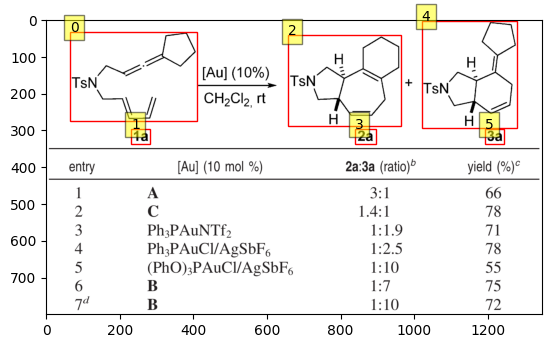

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 3], [6, 2], [0, 1]]
[tensor([636.9000, 142.6200, 891.5900, 251.2500]), tensor([743.5300, 253.6300, 779.1201, 296.5300]), tensor([1050.2600,   95.8800, 1205.6300,  144.6200]), tensor([1110.1500,  148.4600, 1148.6700,  191.3600]), tensor([ 949.4800,  205.4300, 1323.9399,  252.7100]), tensor([1110.1500,  253.6300, 1150.1300,  295.1000])]
[tensor(1), tensor(3), tensor(2), tensor(3), tensor(2), tensor(3)]
tensor(636.9000) tensor(142.6200)
tensor(743.5300) tensor(253.6300)
tensor(1050.2600) tensor(95.8800)
tensor(1110.1500) tensor(148.4600)
tensor(949.4800) tensor(205.4300)
tensor(1110.1500) tensor(253.6300)


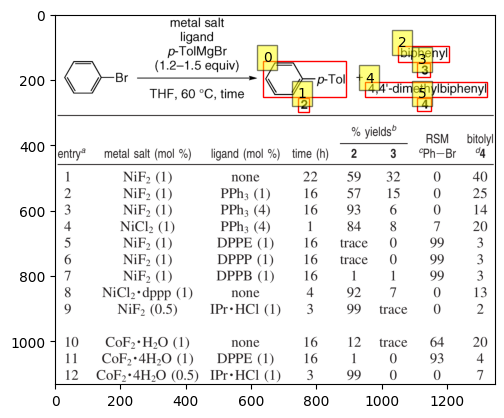

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[5, 10], [4, 9], [3, 7], [2, 8]]
[tensor([ 23.8200,  98.9300, 225.8000, 209.0100]), tensor([ 95.8700, 214.2100, 130.2900, 255.8400]), tensor([647.0600, 100.7300, 901.2400, 212.6100]), tensor([749.7400, 216.0100, 789.5600, 255.8400]), tensor([1052.3500,   53.9000, 1205.6599,  104.5000]), tensor([1109.9900,  106.1300, 1149.8199,  151.3700]), tensor([ 951.4800,  165.5800, 1326.3000,  216.2100]), tensor([1111.7900,  214.2100, 1151.6200,  255.8400])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(3), tensor(2), tensor(3)]
tensor(23.8200) tensor(98.9300)
tensor(95.8700) tensor(214.2100)
tensor(647.0600) tensor(100.7300)
tensor(749.7400) tensor(216.0100)
tensor(1052.3500) tensor(53.9000)
tensor(1109.9900) tensor(106.1300)
tensor(951.4800) tensor(165.5800)
tensor(1111.7900) tensor(214.2100)


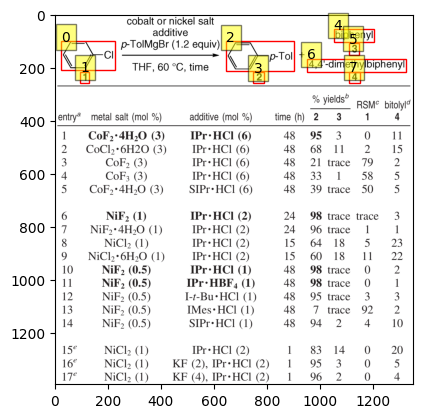

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[2, 1]]
[tensor([ 802.9600,   53.7900, 1277.8401,  162.6300]), tensor([1025.0000,  173.5400, 1055.8000,  209.9200])]
[tensor(1), tensor(3)]
tensor(802.9600) tensor(53.7900)
tensor(1025.) tensor(173.5400)


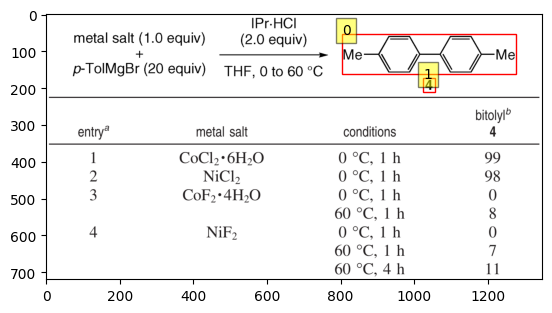

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'bboxes', 'reactions', 'corefs', 'caption', 'pdf', 'diagram_type', 'boxes', 'labels', 'image_id', 'area', 'orig_size', 'size'])
[[3, 2], [1, 7], [0, 6], [10, 5]]
[tensor([ 27.3600, 100.8400, 225.9800, 206.3200]), tensor([ 99.8000, 216.3900, 127.6700, 252.8900]), tensor([646.5400, 106.0100, 900.3500, 211.4900]), tensor([750.0300, 216.3900, 783.0700, 254.6100]), tensor([1051.8500,   47.3700, 1203.9000,   94.2000]), tensor([1113.9399,   99.1100, 1145.2599,  139.0600]), tensor([ 951.8200,  168.1000, 1322.9100,  213.2200]), tensor([1113.9399,  216.3900, 1146.9900,  254.6100])]
[tensor(1), tensor(3), tensor(1), tensor(3), tensor(2), tensor(3), tensor(2), tensor(3)]
tensor(27.3600) tensor(100.8400)
tensor(99.8000) tensor(216.3900)
tensor(646.5400) tensor(106.0100)
tensor(750.0300) tensor(216.3900)
tensor(1051.8500) tensor(47.3700)
tensor(1113.9399) tensor(99.1100)
tensor(951.8200) tensor(168.1000)
tensor(1113.9399) tensor(216.3900)


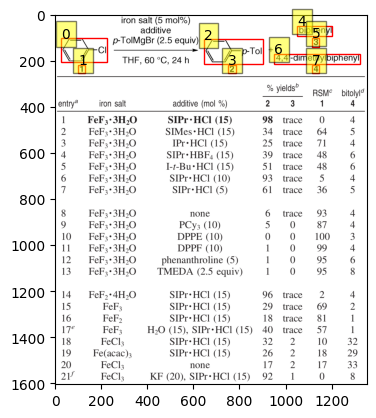

In [6]:
def coref_tokenize(boxes, labels, corefs):
    toreturn_boxes = []
    toreturn_labels = []
    
    for pair in corefs:
        for entry in pair:
            toreturn_boxes.append(boxes[entry])
            toreturn_labels.append(labels[entry])
    return toreturn_boxes, toreturn_labels
    

for i in range(30):
    image1, target1 = train_dataset.load_and_prepare(i)
    plt.figure()
    plt.imshow(image1)
    print(target1.keys())
    print(target1['corefs'])
    data = target1['boxes']
    labels = target1['labels']
    toprocess = list(zip(data.tolist(), labels.tolist()))


    boxes, labels = coref_tokenize(target1['boxes'], target1['labels'], target1['corefs'])
    print(boxes)
    print(labels)
    ax = plt.gca()
    for i, bbox in enumerate(boxes):
        xmin, ymin, xmax, ymax = bbox #* np.array([w, h, w, h])
        print(xmin, ymin)
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='r', linewidth=1))
        ax.text(xmin, ymin, str(i), fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()